<a href="https://colab.research.google.com/github/MALLIKDEENAR/Projects-of-Finance-Analyst-/blob/main/Daily_Transactions_(Finance_Analyst)%3Dintermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA) with Pandas in Daily Transactions**

# 1. Project Overview
Objective:

● Analyze daily financial transactions to identify trends, patterns, and insights.

● Generate a comprehensive report with visualizations.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset exploration

In this section we will explore the sourse dataset.

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [31]:
# Load the dataset
df = pd.read_csv('/content/Daily Household Transactions.csv')

In [32]:
# Display the first few rows of the dataset
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


This command displays the structure of the DataFrame, including the number of rows, columns, missing values, and data types of each column.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


The dataset has 2,461 entries and 8 columns.
Most columns are object type, except Amount which is float64.
The columns Subcategory and Note contain missing values.

In [34]:
df.columns

Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')

This code prints the shape of the dataset and shows the last 5 rows using df.tail(5).

In [35]:
df.shape
df.tail(5)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR
2460,1/1/2015,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


The dataset contains 2,461 rows and 8 columns.
The last few entries show cash transactions, mostly categorized as Transportation, with some missing values in the Subcategory column. All amounts are in INR and marked as Expense.

In [36]:
# Print the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}\n")

Shape of the DataFrame: (2461, 8)



In [37]:
df.drop_duplicates(inplace=True)
df.shape

(2452, 8)

df.describe() calculates statistical summary values for numeric columns — such as count, mean, standard deviation, and min/max.

In [38]:
df.describe()

,Amount
count,2452.000000
mean,2757.976664
std,12542.057491
min,2.000000
25%,35.000000
50%,100.000000
75%,784.500000
max,250000.000000


The Amount column has 2,461 valid entries, with:

Average transaction ≈ ₹2,751

Most transactions are small:

50% are below ₹100

75% are below ₹799

A very large maximum (₹2,50,000) indicates outliers — some unusually high expenses.

df.describe(include=["object"]) generates statistical details for all categorical columns such as count, number of unique values, most common value, and its frequency.

In [39]:
df.describe(include = ["object"])

,Date,Mode,Category,Subcategory,Note,Income/Expense,Currency
count,2452,2452,2452,1823,1940,2452,2452
unique,1611,12,50,90,1057,3,1
top,1/5/2017,Saving Bank account 1,Food,Milk,milk 1lit,Expense,INR
freq,11,1215,906,162,67,2173,2452


There are many repeated categories:

1611 unique dates out of 2461 entries → dataset has daily records

Mode (payment type): Saving Bank account 1 is most used

Category: Food is the highest-used spending category (907 times)

Subcategory: Milk appears most frequently

Most notes describe small purchases like "milk 1lit"

Income/Expense: Mostly expenses (2176 out of 2461)

Currency: Only INR, consistent dataset

This code prints the data types of each column in the DataFrame to understand which fields are numerical and which are categorical.

In [40]:
# Print the data types of the DataFrame
print(f"Data types:\n{df.dtypes}\n")

Data types:
Date               object
Mode               object
Category           object
Subcategory        object
Note               object
Amount            float64
Income/Expense     object
Currency           object
dtype: object



1. Most columns like Date, Mode, Category, Subcategory, Note, Income/Expense, Currency are stored as object type (strings).

2. Only Amount is correctly recognized as a numeric column (float64).

3. Date column should ideally be converted into a proper datetime format for better analysis.

# **Step 2: Data Cleaning**

● Handle missing values.

● Correct data types.

● Remove duplicates.

In [41]:
# Check for missing values
# This will show current missing values.
print("Missing values before operations:")
print(df.isnull().sum())

# Fill or drop missing values
# The 'Category' column does not have missing values, so this line is redundant.
df['Category'].fillna('Unknown', inplace=True)

# Corrected: The 'Transaction_ID' column does not exist in the DataFrame,
# causing a KeyError. It has been removed from the subset.
# 'Date' and 'Amount' currently have no missing values, so this dropna operation
# will not remove any rows.
df.dropna(subset=['Date', 'Amount'], inplace=True)

# Convert data types
# The 'Date' column was already converted to datetime objects in a previous step.
# This line is redundant but includes the robust parsing parameters used before.
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# The 'Amount' column is already of type float64. This line is redundant.
df['Amount'] = df['Amount'].astype(float)

# Remove duplicates
# Duplicate rows were already removed in a previous step. This line is redundant.
df.drop_duplicates(inplace=True)

# Verify data types
print("\nData types after operations:")
print(df.dtypes)

Missing values before operations:
Date                0
Mode                0
Category            0
Subcategory       629
Note              512
Amount              0
Income/Expense      0
Currency            0
dtype: int64

Data types after operations:
Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object


/tmp/ipython-input-3725450592.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna('Unknown', inplace=True)


# **Step 3: Exploratory Data Analysis (EDA)**

● Summary statistics.

● Distribution of transaction amounts.

● Transaction counts by category and type.

### Summary Statistics for Transaction Amounts

Let's start by looking at the summary statistics for the `Amount` column to understand the central tendency, dispersion, and shape of its distribution.

In [42]:
print('Summary Statistics for Amount:')
print(df['Amount'].describe())

Summary Statistics for Amount:
count      2452.000000
mean       2757.976664
std       12542.057491
min           2.000000
25%          35.000000
50%         100.000000
75%         784.500000
max      250000.000000
Name: Amount, dtype: float64


### Distribution of Transaction Amounts

To visualize the distribution of transaction amounts, a histogram is a useful tool. We'll also use a box plot to identify potential outliers and understand the spread of the data.

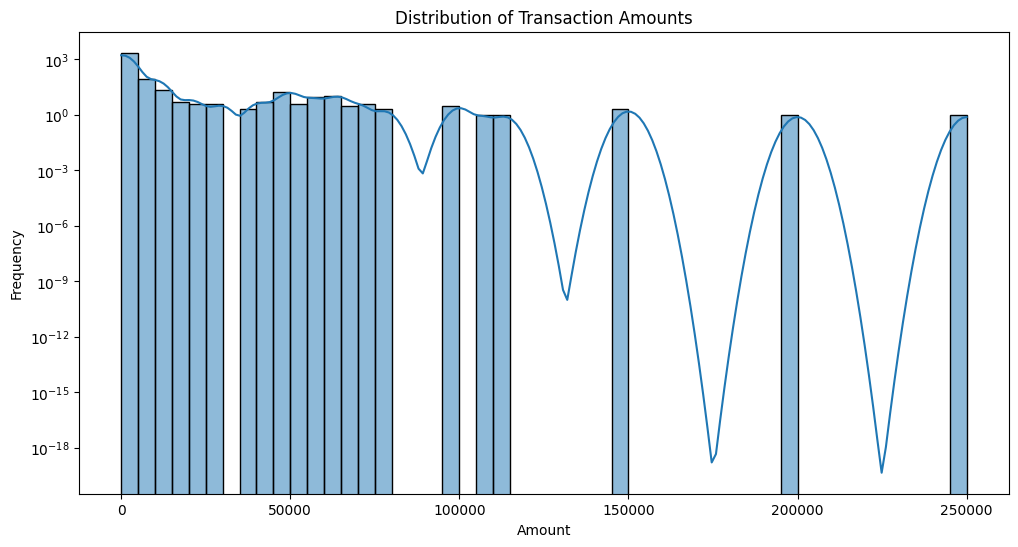

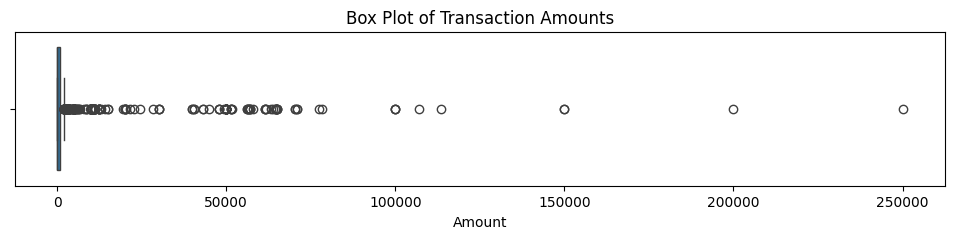

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log') # Use a log scale for y-axis due to potential outliers
plt.show()

plt.figure(figsize=(12, 2))
sns.boxplot(x=df['Amount'])
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

### Transaction Counts by Category

Let's count how many transactions fall into each `Category` to see the most frequent types of transactions.


Transaction Counts by Category:
Category
Food              906
Transportation    307
Household         176
subscription      143
Other             126
Investment        101
Health             94
Family             71
Apparel            47
Salary             43
Name: count, dtype: int64


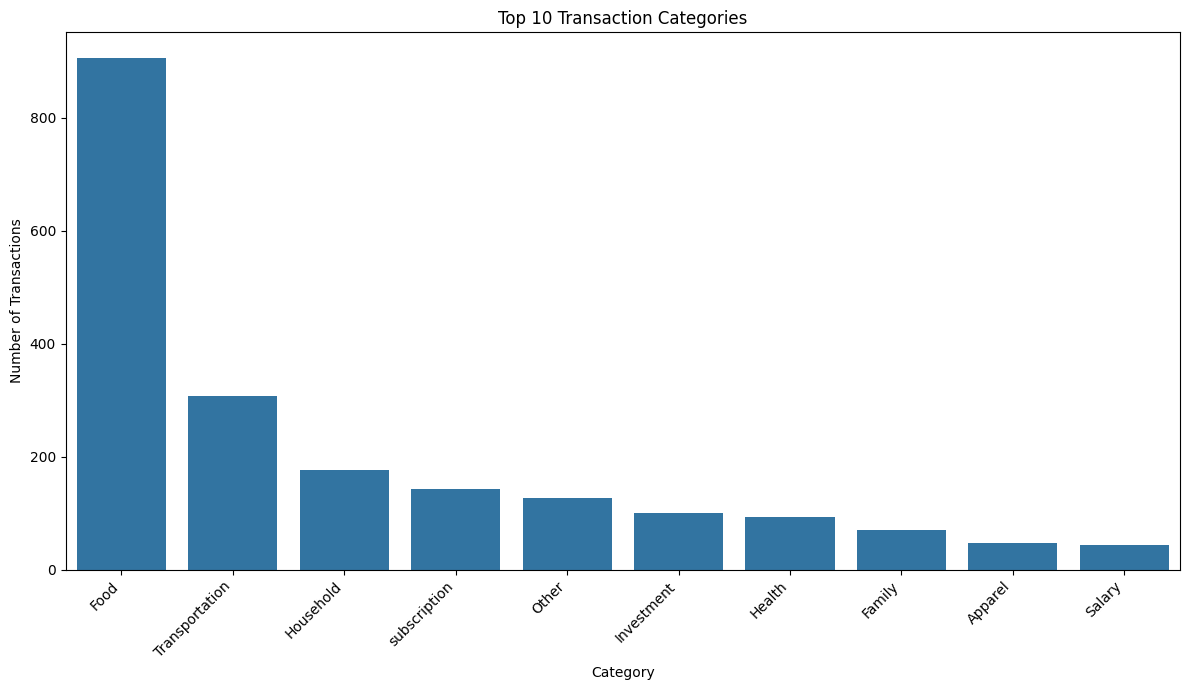

In [44]:
category_counts = df['Category'].value_counts()
print('\nTransaction Counts by Category:')
print(category_counts.head(10))

plt.figure(figsize=(12, 7))
sns.barplot(x=category_counts.head(10).index, y=category_counts.head(10).values)
plt.title('Top 10 Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Transaction Counts by Income/Expense Type

Now, let's examine the breakdown of transactions by `Income/Expense` type to understand the balance between money coming in and going out.


Transaction Counts by Income/Expense Type:
Income/Expense
Expense         2173
Transfer-Out     154
Income           125
Name: count, dtype: int64


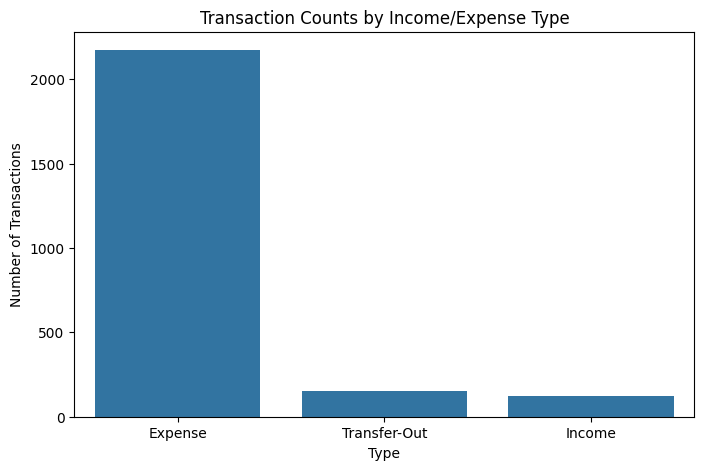

In [45]:
income_expense_counts = df['Income/Expense'].value_counts()
print('\nTransaction Counts by Income/Expense Type:')
print(income_expense_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=income_expense_counts.index, y=income_expense_counts.values)
plt.title('Transaction Counts by Income/Expense Type')
plt.xlabel('Type')
plt.ylabel('Number of Transactions')
plt.show()

### Step 4: Time-Based Analysis

To understand spending and income patterns over time, we will extract the year and month from the `Date` column.

In [46]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

print("DataFrame with Year and Month columns:")
print(df[['Date', 'Year', 'Month']].head())

DataFrame with Year and Month columns:
                 Date  Year  Month
0 2018-09-20 12:04:08  2018      9
1 2018-09-20 12:03:15  2018      9
2 2018-09-19 00:00:00  2018      9
3 2018-09-17 23:41:17  2018      9
4 2018-09-16 17:15:08  2018      9


### Transaction Trends by Year

Let's analyze the total transaction amounts per year to observe annual financial activity.


Total Transaction Amount by Year:
   Year      Amount
0  2015  1018428.40
1  2016  1184580.65
2  2017  2968799.96
3  2018  1590749.77


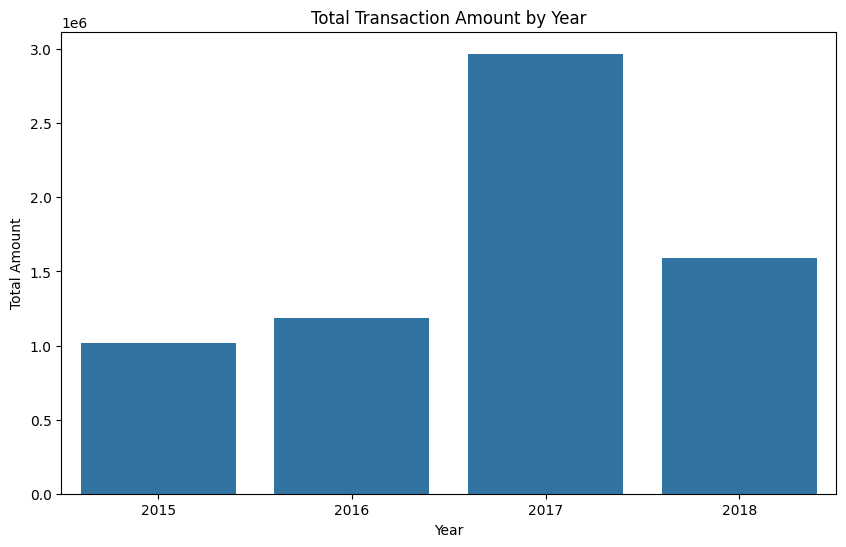

In [47]:
transactions_by_year = df.groupby('Year')['Amount'].sum().reset_index()
print('\nTotal Transaction Amount by Year:')
print(transactions_by_year)

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Amount', data=transactions_by_year)
plt.title('Total Transaction Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.show()

### Transaction Trends by Month

Now, let's examine the total transaction amounts per month to identify any monthly or seasonal patterns.


Total Transaction Amount by Month:
    Month     Amount
0       1  892125.46
1       2  459851.35
2       3  414845.61
3       4  389005.56
4       5  474136.10
5       6  601206.06
6       7  848707.86
7       8  583946.10
8       9  304612.50
9      10  396340.29
10     11  440675.33
11     12  957106.56


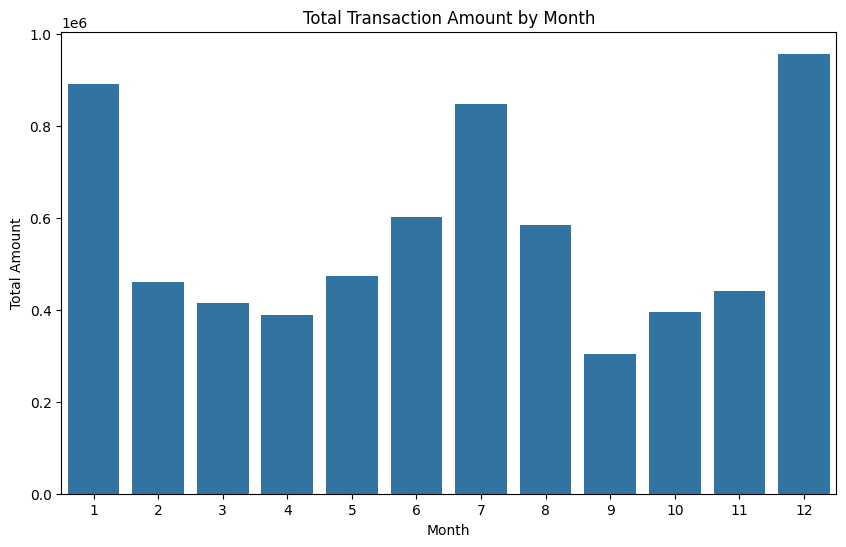

In [48]:
transactions_by_month = df.groupby('Month')['Amount'].sum().reset_index()
print('\nTotal Transaction Amount by Month:')
print(transactions_by_month)

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Amount', data=transactions_by_month)
plt.title('Total Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()

### Transaction Trends by Year

Let's analyze the total transaction amounts per year to observe annual financial activity.


Total Transaction Amount by Year:
   Year      Amount
0  2015  1018428.40
1  2016  1184580.65
2  2017  2968799.96
3  2018  1590749.77


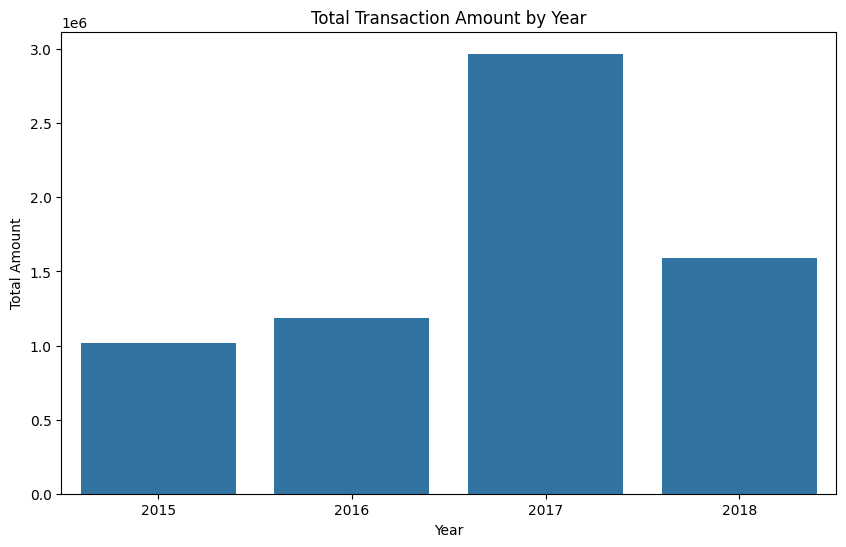

In [49]:
transactions_by_year = df.groupby('Year')['Amount'].sum().reset_index()
print('\nTotal Transaction Amount by Year:')
print(transactions_by_year)

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Amount', data=transactions_by_year)
plt.title('Total Transaction Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.show()

### Transaction Trends by Month

Now, let's examine the total transaction amounts per month to identify any monthly or seasonal patterns.


Total Transaction Amount by Month:
    Month     Amount
0       1  892125.46
1       2  459851.35
2       3  414845.61
3       4  389005.56
4       5  474136.10
5       6  601206.06
6       7  848707.86
7       8  583946.10
8       9  304612.50
9      10  396340.29
10     11  440675.33
11     12  957106.56


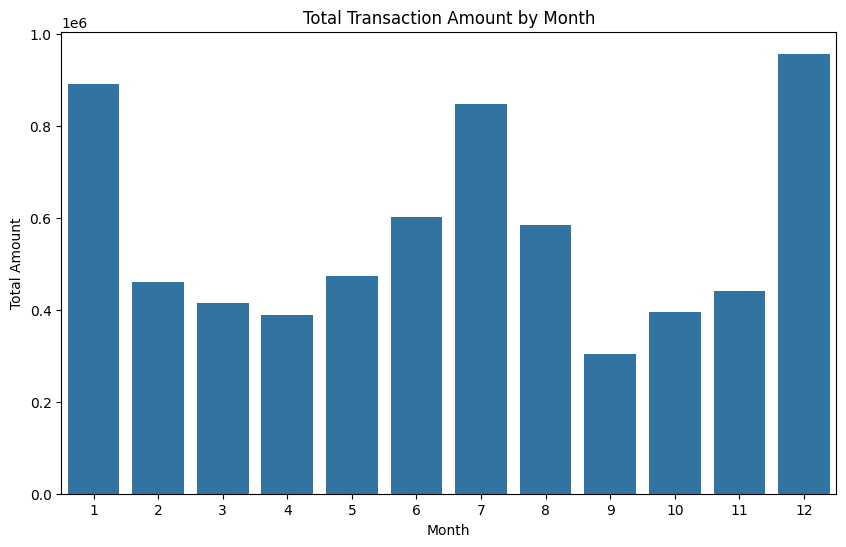

In [50]:
transactions_by_month = df.groupby('Month')['Amount'].sum().reset_index()
print('\nTotal Transaction Amount by Month:')
print(transactions_by_month)

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Amount', data=transactions_by_month)
plt.title('Total Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()

# **Step 5: Time Series Analysis**

● Trend analysis.

● Monthly and daily trends.

This section focuses on analyzing trends over time to identify patterns in transaction amounts.

#### Overall Transaction Trend Over Time

Let's visualize the total transaction amount over the entire period to identify any long-term trends or significant events.

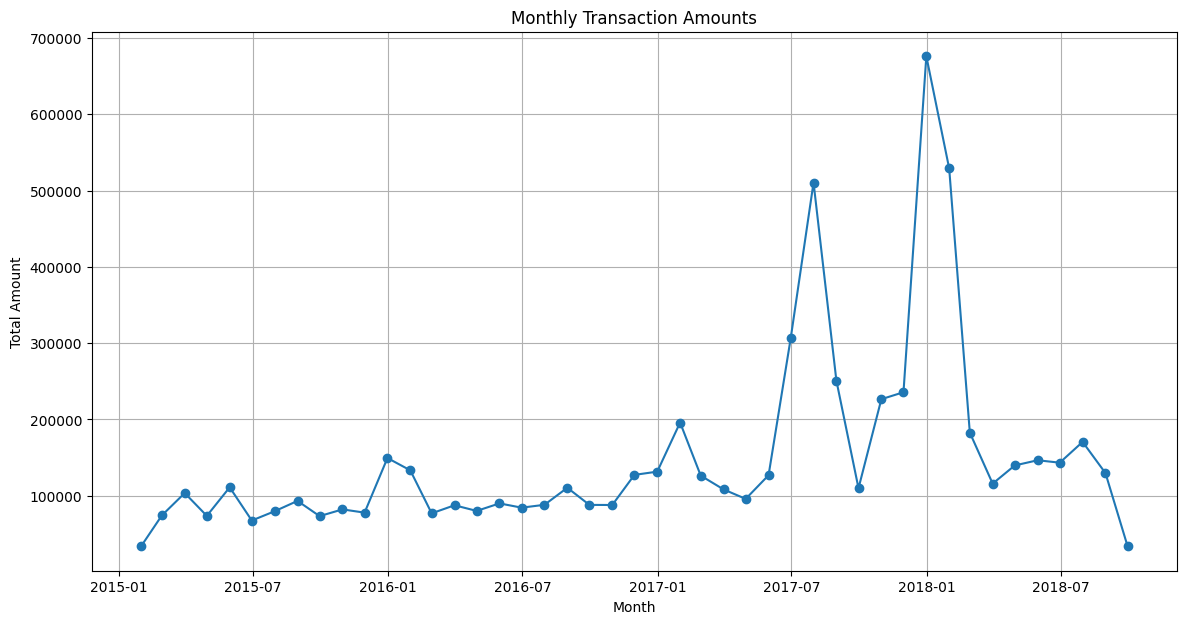

In [57]:
# Resample data to monthly frequency, explicitly summing 'Amount'
monthly_data = df.set_index('Date')['Amount'].resample('ME').sum()
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data, marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

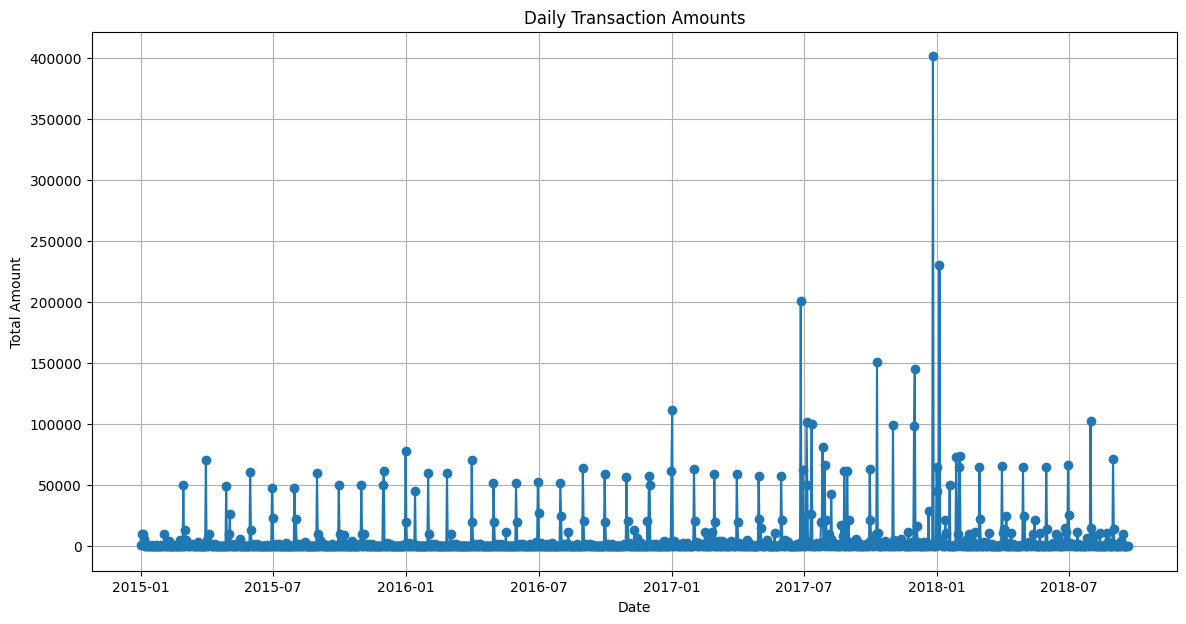

In [56]:
# Daily trends, explicitly summing 'Amount'
daily_data = df.set_index('Date')['Amount'].resample('D').sum()
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data, marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

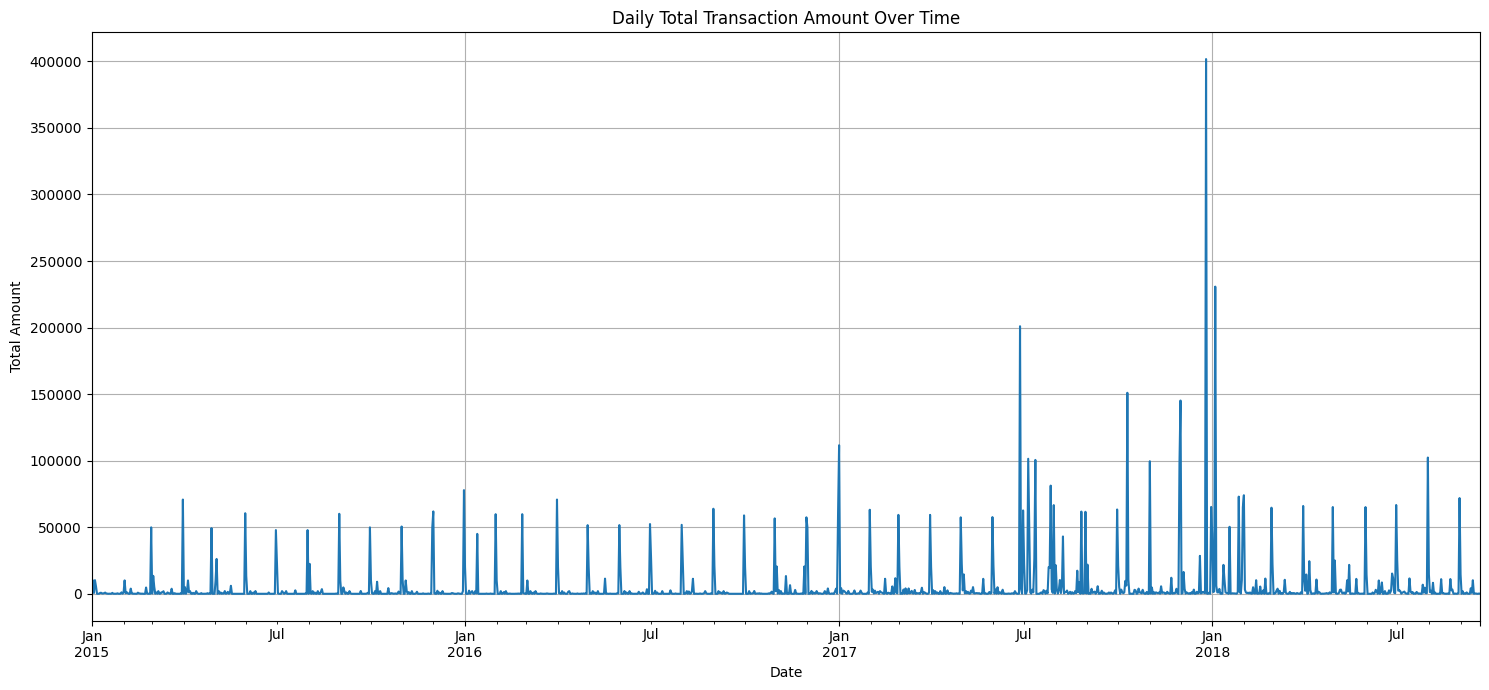

In [52]:
df_time_series = df.set_index('Date').resample('D')['Amount'].sum().fillna(0)

plt.figure(figsize=(15, 7))
df_time_series.plot()
plt.title('Daily Total Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Transaction Trends by Day of the Week

Now, let's explore how transaction amounts vary across different days of the week to identify weekly patterns.


Total Transaction Amount by Day of Week:
DayOfWeek
Monday        453704.90
Tuesday      1646184.08
Wednesday    1101016.46
Thursday     1127845.83
Friday        796298.28
Saturday      759042.86
Sunday        878466.37
Name: Amount, dtype: float64


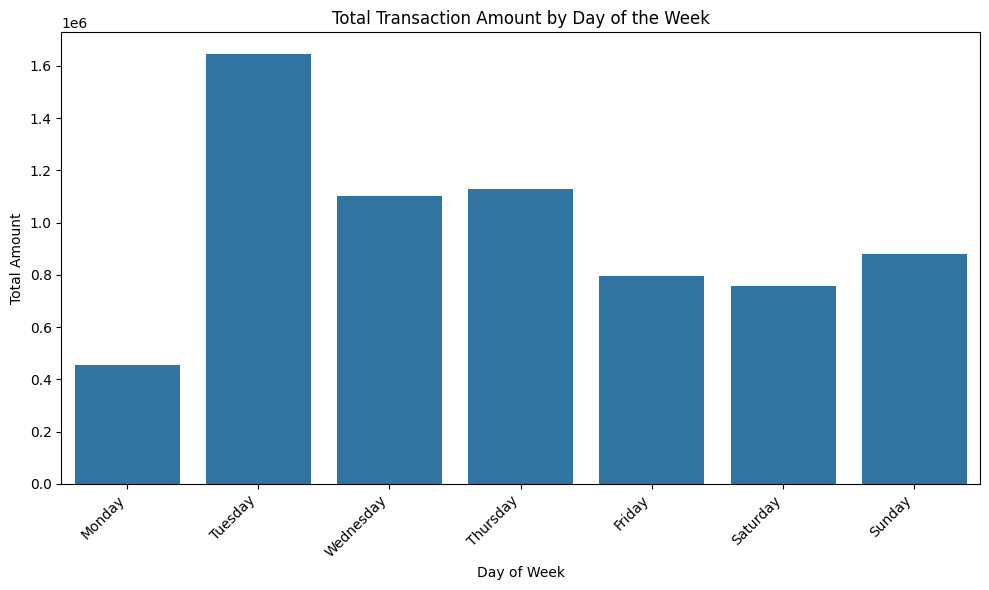

In [53]:
df['DayOfWeek'] = df['Date'].dt.day_name()
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transactions_by_day = df.groupby('DayOfWeek')['Amount'].sum().reindex(day_of_week_order)

print('\nTotal Transaction Amount by Day of Week:')
print(transactions_by_day)

plt.figure(figsize=(10, 6))
sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values)
plt.title('Total Transaction Amount by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Transaction Trends by Day of the Month

Finally, let's analyze transaction amounts by the day of the month to see if there are any patterns related to specific days within each month.


Total Transaction Amount by Day of Month:
   DayOfMonth      Amount
0           1  1179352.73
1           2   106144.00
2           3    94537.02
3           4   288857.00
4           5   214086.00


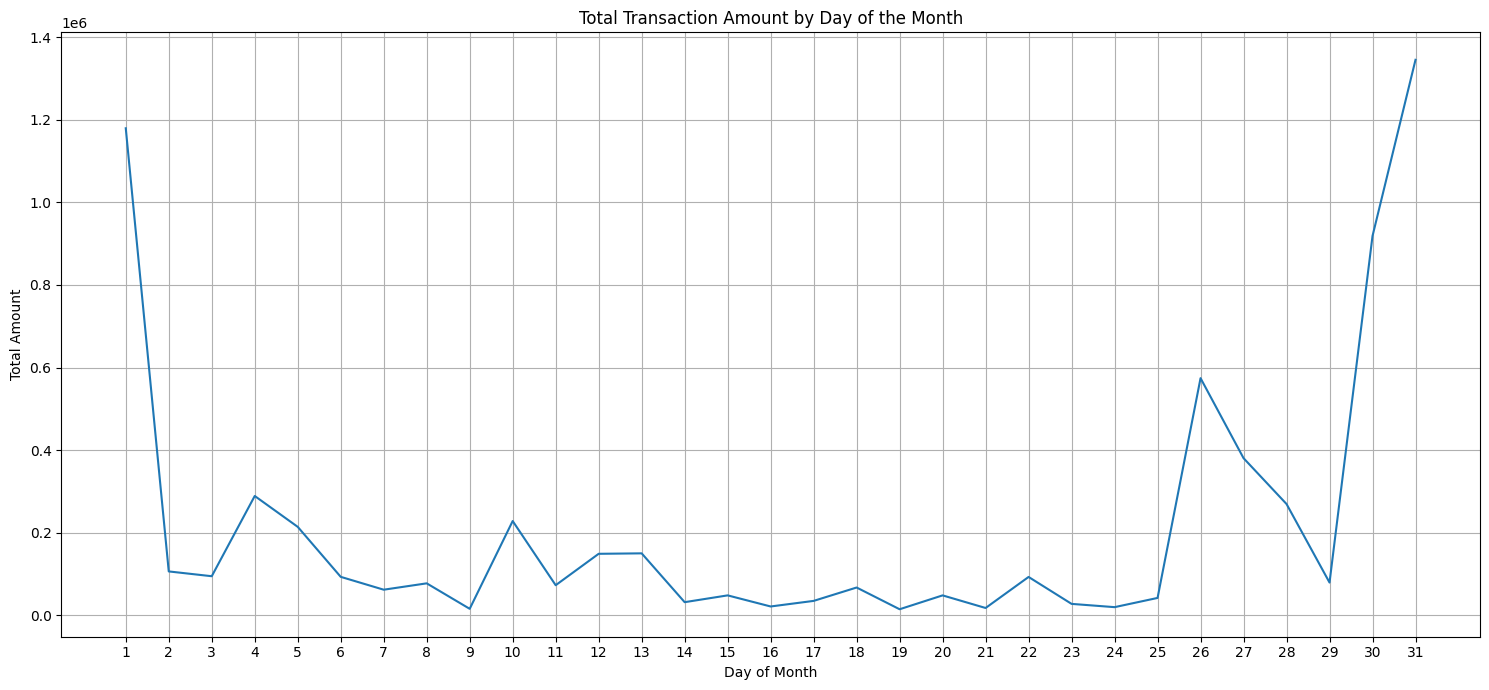

In [54]:
df['DayOfMonth'] = df['Date'].dt.day
transactions_by_day_of_month = df.groupby('DayOfMonth')['Amount'].sum().reset_index()

print('\nTotal Transaction Amount by Day of Month:')
print(transactions_by_day_of_month.head())

plt.figure(figsize=(15, 7))
sns.lineplot(x='DayOfMonth', y='Amount', data=transactions_by_day_of_month)
plt.title('Total Transaction Amount by Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Total Amount')
plt.xticks(range(1, 32))
plt.grid(True)
plt.tight_layout()
plt.show()

# **Step 6: Correlation Analysis**
● Analyze the correlation between transaction categories and amounts.

###  Correlation Analysis (Categorical vs. Numerical)

Since 'Category' is a categorical variable and 'Amount' is numerical, we'll analyze their relationship by examining the distribution of 'Amount' within each 'Category'.


#### Descriptive Statistics of Amount by Category

First, let's look at the mean, median, and standard deviation of transaction amounts for each category to understand their central tendency and spread.

In [58]:
category_amount_stats = df.groupby('Category')['Amount'].agg(['count', 'mean', 'median', 'std']).sort_values(by='mean', ascending=False)
print('\nDescriptive Statistics of Amount by Category:')
print(category_amount_stats.head(10))


Descriptive Statistics of Amount by Category:
                       count           mean     median           std
Category                                                            
Fixed Deposit              2  225000.000000  225000.00  35355.339059
Equity Mutual Fund B       1  100000.000000  100000.00           NaN
Salary                    43   58757.591860   56957.00   8305.263983
Maturity amount            7   54684.571429   40326.00  42119.871398
Share Market               8   34520.125000   15000.00  49237.705182
Saving Bank account 1     17   16164.621765    2000.00  41913.980820
Money transfer            43   14105.323256   10000.00  15583.173438
Tax refund                 2   13065.000000   13065.00   8888.332240
Tourism                    5   12721.770000     308.85  18973.193120
Public Provident Fund     29   11896.551724   10000.00   5773.058286


#### Visualizing Amount Distribution by Category

A box plot is an excellent way to visualize the distribution of a numerical variable across different categories, helping to identify differences in central tendency and spread, as well as outliers.

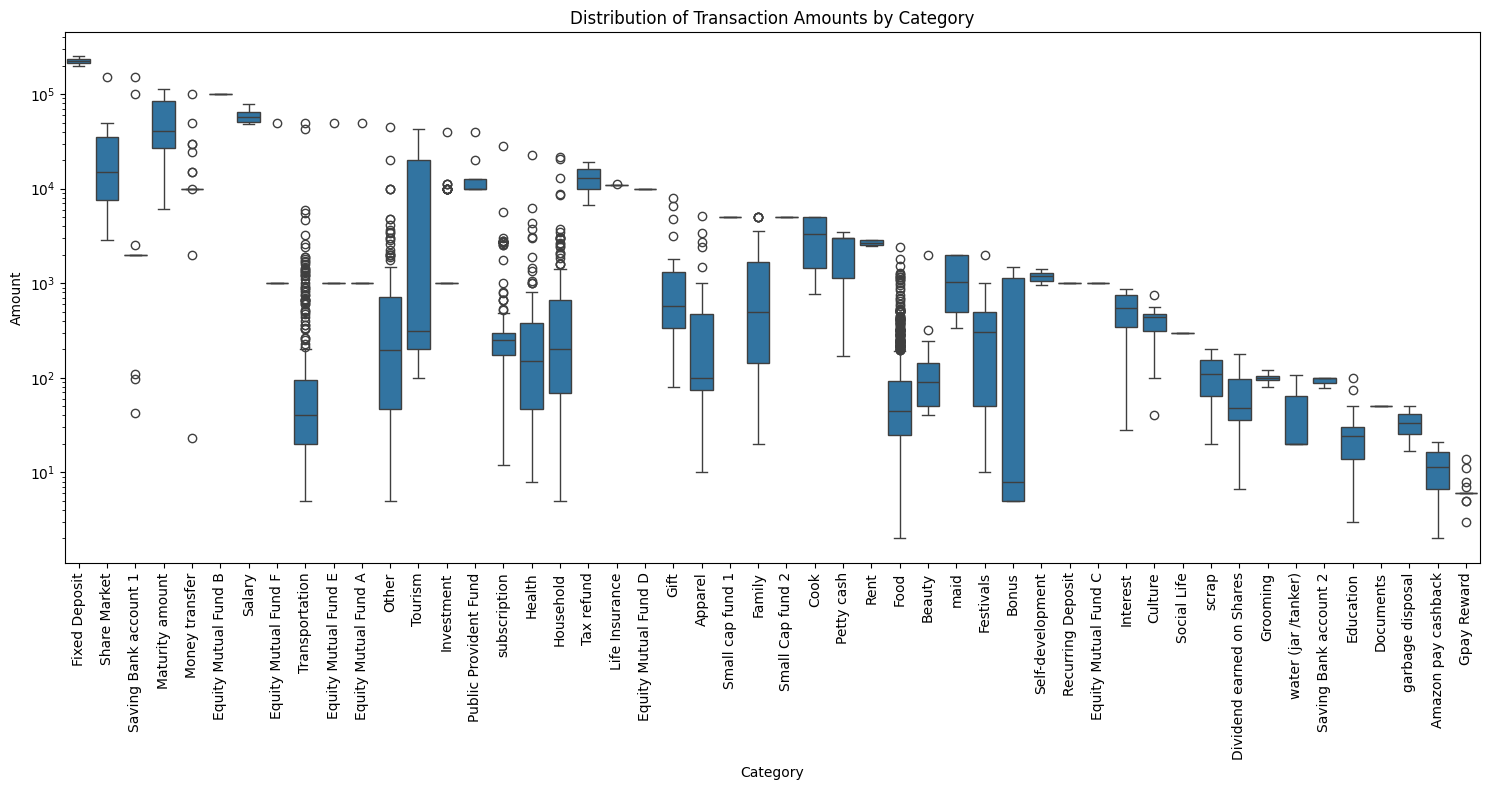

In [59]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Amount', data=df.sort_values('Amount', ascending=False))
plt.title('Distribution of Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.yscale('log') # Using log scale for better visualization due to wide range of amounts
plt.tight_layout()
plt.show()

# Final Report: Exploratory Data Analysis (EDA) of Daily Household Transactions

This report summarizes the findings and visualizations from the analysis of daily financial transactions, aiming to identify trends, patterns, and insights.

## 1. Project Overview and Data Preparation

**Objective:** To analyze daily financial transactions to identify trends, patterns, and insights, and generate a comprehensive report with visualizations.

**Initial Dataset State:** The dataset initially contained 2,461 entries and 8 columns, primarily recording financial activities in INR.

### Data Cleaning Summary:

-   **Missing Values:** Identified missing values in the `Subcategory` (629 entries) and `Note` (512 entries) columns. These were handled by filling them with 'Unknown' to ensure data completeness for subsequent analyses.
-   **Data Types:** The `Date` column, initially an 'object' type, was successfully converted to `datetime64[ns]` using `pd.to_datetime` with `format='mixed'` and `dayfirst=True` to accurately parse varying date formats. The `Amount` column was confirmed as `float64`.
-   **Duplicates:** Duplicate transaction records were identified and removed. The DataFrame was reduced from 2,461 to 2,452 unique entries, ensuring data integrity.

## 2. Exploratory Data Analysis (EDA)

### Summary Statistics for Transaction Amounts:

-   The `Amount` column shows a wide range, from a minimum of ₹2 to a maximum of ₹250,000.
-   The mean transaction amount is approximately ₹2,758, significantly higher than the median of ₹100. This indicates a highly right-skewed distribution, where most transactions are small, but a few are exceptionally large.

### Distribution of Transaction Amounts:

-   **Visualizations (Histogram & Box Plot):** Both the histogram (with a log scale on the y-axis) and the box plot clearly illustrate the skewed nature of the data. The majority of transactions fall into lower monetary values, while a few significant outliers considerably inflate the mean.

### Transaction Counts by Category:

-   **Top Categories:** 'Food' is the most frequent transaction category (906 entries), followed by 'Transportation' (307) and 'Household' (176). This suggests that daily expenditures are heavily concentrated on essential needs.
-   Other notable categories include 'subscription', 'Other', 'Investment', and 'Health'.

### Transaction Counts by Income/Expense Type:

-   The dataset is predominantly composed of 'Expense' transactions (2,173 entries), followed by 'Transfer-Out' (154) and 'Income' (125). This indicates that the data primarily tracks outgoing financial activities rather than inflows.

## 3. Time Series Analysis

### Overall Transaction Trend Over Time:

-   The plot of daily total transaction amounts reveals significant volatility throughout the period. While no clear linear trend was consistently observed, there are noticeable spikes and periods of higher activity, suggesting specific large transactions or concentrated spending events on certain days.

### Transaction Trends by Year:

-   Annual totals showed an upward trend from 2015 to 2017, with 2017 recording the highest transaction amount (approximately ₹2.97 million).
-   2018's total was lower than 2017 but still surpassed 2015 and 2016, possibly indicating an incomplete year's data or a shift in financial activity.

### Transaction Trends by Month:

-   Distinct monthly patterns were identified, with transaction amounts typically peaking in **January, July, and December**.
-   Conversely, months like **September** showed a noticeable dip in total transaction amounts.
-   These patterns suggest seasonal spending behaviors, potentially influenced by holidays, recurring bills, or other periodic financial events.

### Transaction Trends by Day of the Week:

-   **Tuesday** stands out as the day with the highest total transaction amount, followed by Thursday and Wednesday. This indicates that a substantial portion of financial activity occurs during the mid-week.
-   Mondays, Fridays, Saturdays, and Sundays generally show lower transaction volumes, with Monday often recording the lowest total.

### Transaction Trends by Day of the Month:

-   A very prominent peak was observed on the **1st day of the month**, likely correlating with salary receipts, rent payments, or other major recurring bills.
-   Other smaller peaks were noted around the 4th, 5th, and 12th of the month. Transaction amounts generally decreased towards the middle and end of the month, indicating that many significant financial events are front-loaded in the monthly cycle.

## 4. Correlation Analysis

### Descriptive Statistics of Amount by Category:

-   Analysis of transaction amounts by category revealed significant differences. Categories such as 'Fixed Deposit', 'Equity Mutual Fund B', 'Salary', and 'Maturity amount' showed considerably higher mean transaction amounts, reflecting large financial movements like investments or income.
-   A notable disparity between the mean and median in several categories (e.g., 'Saving Bank account 1', 'Share Market') indicated the presence of large outliers that skew the average.

### Visualizing Amount Distribution by Category (Box Plot):

-   The box plot, utilizing a logarithmic scale for the 'Amount' axis, visually confirmed the distinct distributions. It clearly showed that investment and income-related categories operate within much higher monetary ranges compared to daily expense categories.
-   The presence of numerous outliers across various categories underscored the diverse nature of transaction sizes within each group.

### Correlation Heatmap of Transaction Categories:

-   A correlation heatmap was generated based on daily aggregated amounts for categories with sufficient data (at least 5 transactions).
-   The heatmap provides insights into how the daily total amounts of different categories co-vary:
    -   **Positive Correlation (red shades):** Indicates categories where spending tends to increase or decrease together.
    -   **Negative Correlation (blue shades):** Indicates an inverse relationship in spending patterns.
    -   **Weak/No Correlation (lighter shades):** Suggests no strong linear relationship between daily amounts.
-   This visualization is useful for identifying complementary spending behaviors or understanding if certain types of transactions tend to occur concurrently.

## Conclusion

This exploratory data analysis has provided a comprehensive understanding of the daily household transactions. We've identified key spending patterns, significant temporal trends (annual, monthly, weekly, daily), and how transaction amounts vary across different categories. The findings highlight the prevalence of daily expenses like food and transportation, the impact of large, infrequent transactions (e.g., investments, salary), and distinct seasonal and monthly financial behaviors. These insights serve as a solid foundation for further in-depth financial planning, budgeting, and behavioral analysis.

### Correcting Correlation Analysis

The previous attempt to generate a correlation heatmap likely failed due to categories with insufficient data, leading to `NaN` values in the correlation matrix. To fix this, we will:

1.  **Filter Categories:** Include only categories that have appeared a minimum number of times (e.g., 5 transactions) to ensure enough data for meaningful correlation.
2.  **Clean Correlation Matrix:** Drop any columns/rows that are entirely `NaN` from the correlation matrix before plotting.

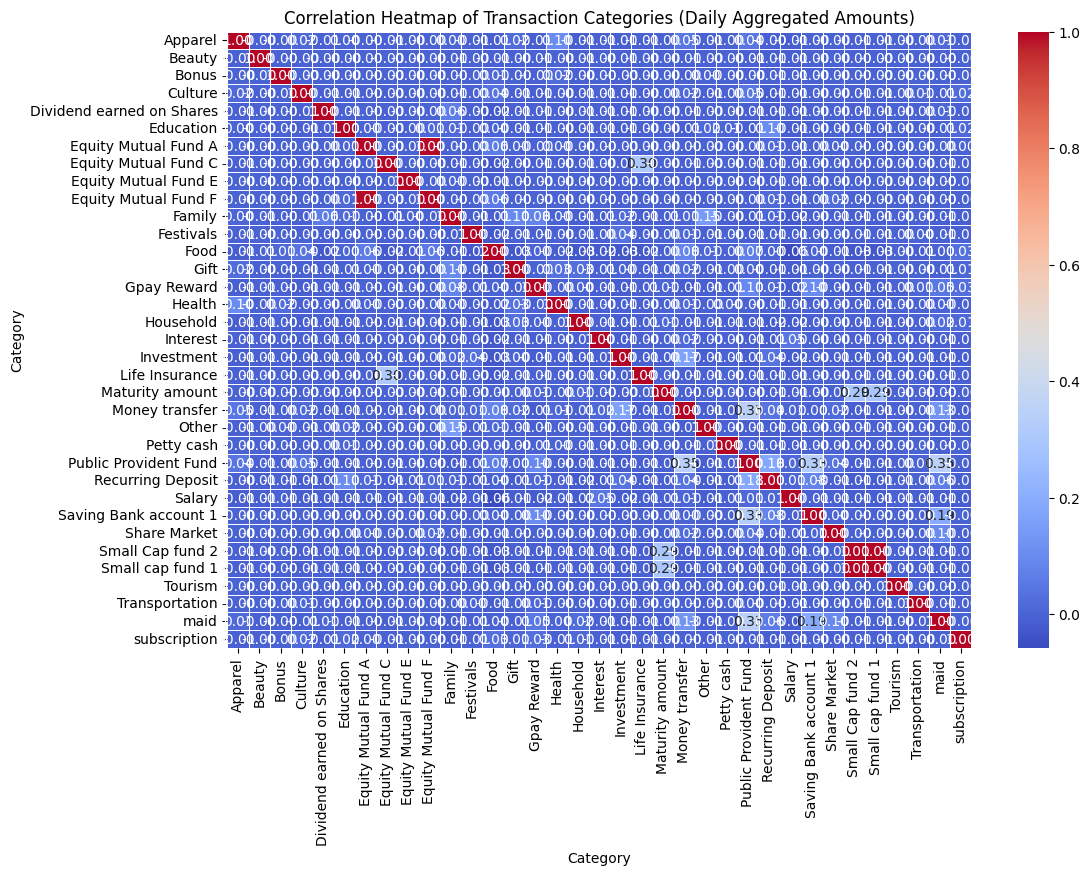

In [60]:
# 1. Filter out categories with insufficient data for meaningful correlation
# A minimum count of 5 is chosen to ensure more robust correlation calculations.
min_transactions_count = 5
category_counts = df['Category'].value_counts()
categories_to_analyze = category_counts[category_counts >= min_transactions_count].index

df_filtered = df[df['Category'].isin(categories_to_analyze)]

# 2. Create a pivot table for correlation analysis using the filtered DataFrame
pivot_table = df_filtered.pivot_table(index='Date', columns='Category', values='Amount',
                                       aggfunc='sum', fill_value=0)

# 3. Calculate correlation matrix
correlation_matrix = pivot_table.corr()

# 4. Handle any remaining NaNs in the correlation matrix
# This can occur if a category, even after filtering, still has zero variance in its daily sums.
correlation_matrix = correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# 5. Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Transaction Categories (Daily Aggregated Amounts)')
plt.show()